## *NOTE:* Assignment 3 data collection begins at bottom of notebook
This is a copy of my previous assignment notebook -- I just added to it.

### Data collected so far

In [13]:
#Install proper packages

import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

ox.config(use_cache=True, log_console=True)
ox.__version__

'0.11.4'

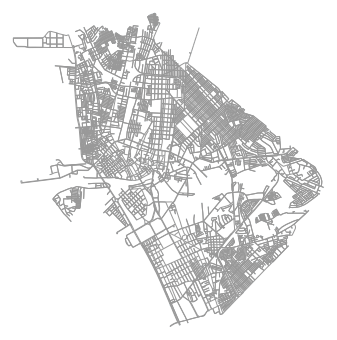

In [226]:
#Extract driving network for Manila

G = ox.graph_from_place('Manila, Philippines', network_type='drive')
fig, ax = ox.plot_graph(G, node_size = .1)

In [227]:
#Convert to shapefile 

ox.save_graph_shapefile(G,filename='mnl_driving')

KeyboardInterrupt: 

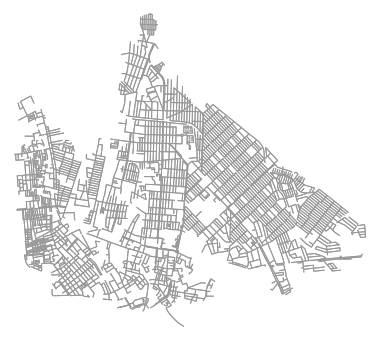

In [2]:
#Extract walking network for Manila

G = ox.graph_from_place('Manila, Philippines', network_type='walk',)
fig, ax = ox.plot_graph(G, node_size = 0)

In [ ]:
# Convert to Shapefile 

ox.save_graph_shapefile(G, filename='mnl_walking')

In [ ]:
#Calculate edge bearings and visualize their frequency to better understand grid 

G = ox.add_edge_bearings(G)
bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('Manila street network edge bearings')
plt.show()

In [ ]:
#Show edge bearings on a polar plot
#The grid is highly variable - a good sign for choice / connectivity

import numpy as np
n = 50
count, division = np.histogram(bearings, bins=[ang*360/n for ang in range(0,n+1)])
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=0.0)
ax.set_title('Manila street network edge bearings', y=1.1)
plt.show()

In [ ]:
#What sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

In [ ]:
#Here I'm showing other basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')

In [ ]:
#Here I have a generic polygon for the city, which I can export (I think) as a shapefile

city = ox.gdf_from_place('Manila, Philippines')
ox.save_gdf_shapefile(city)
city = ox.project_gdf(city)
fig, ax = ox.plot_shape(city, figsize=(5,5))

## Data I still need:
-Barangay polygons for Manila 

-Population density 

-Expected evacuation time from network

-Lots of other data regarding different anchor institutions 

## Random data that may or may not be helpful 

In [ ]:
#GeoJSON of Rail Routes in Manila (there is one)
url = 'https://transit.land/api/v1/routes.geojson?operated_by=o-wdw4-philippinenationalrailways&per_page=false'

with open('routes.geojson', 'wb') as f:
    r = requests.get(url)
    f.write(r.content)

In [ ]:
routes = gpd.read_file('routes.geojson')

In [ ]:
routes.head() #Doesn't look too helpful...

In [ ]:
#GeoJSON of rail stops in Manila (There are 34)
url = 'https://transit.land/api/v1/stops.geojson?served_by=o-wdw4-philippinenationalrailways&per_page=false'

with open('stops.geojson', 'wb') as f:
    r = requests.get(url)
    f.write(r.content)

In [ ]:
stops = gpd.read_file('stops.geojson')

In [ ]:
stops.head() #Again, doesn't seem super promising...

### -- -- -- 




## *Begin data for Assignment 3*

Data for barangays

In [6]:
gdf = gpd.read_file('Metropolitan Manila') #Barangay shapefile within the Github folder
print (gdf)

gdf.head()

      ID_0  ISO       NAME_0  ID_1               NAME_1  ID_2      NAME_2  \
0      177  PHL  Philippines    47  Metropolitan Manila   955      Manila   
1      177  PHL  Philippines    47  Metropolitan Manila   955      Manila   
2      177  PHL  Philippines    47  Metropolitan Manila   955      Manila   
3      177  PHL  Philippines    47  Metropolitan Manila   955      Manila   
4      177  PHL  Philippines    47  Metropolitan Manila   955      Manila   
...    ...  ...          ...   ...                  ...   ...         ...   
1686   177  PHL  Philippines    47  Metropolitan Manila   966  Valenzuela   
1687   177  PHL  Philippines    47  Metropolitan Manila   966  Valenzuela   
1688   177  PHL  Philippines    47  Metropolitan Manila   966  Valenzuela   
1689   177  PHL  Philippines    47  Metropolitan Manila   966  Valenzuela   
1690   177  PHL  Philippines    47  Metropolitan Manila   966  Valenzuela   

       ID_3         NAME_3 NL_NAME_3 VARNAME_3    TYPE_3 ENGTYPE_3  \
0    

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,VARNAME_3,TYPE_3,ENGTYPE_3,PROVINCE,REGION,geometry
0,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,25137,Barangay 744,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,"POLYGON ((120.99477 14.57022, 120.99482 14.569..."
1,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,25138,Barangay 745,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,"POLYGON ((120.99721 14.56913, 120.99670 14.569..."
2,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,25139,Barangay 746,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,"POLYGON ((120.99826 14.56850, 120.99783 14.568..."
3,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,25140,Barangay 747,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,"POLYGON ((120.99947 14.57076, 120.99891 14.570..."
4,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,25141,Barangay 748,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,"POLYGON ((120.99860 14.57043, 120.99936 14.569..."


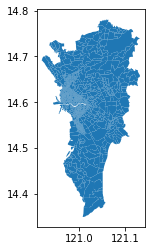

In [7]:
%matplotlib inline 
gdf.plot() #Visualizes all barangays for Metro Manila region

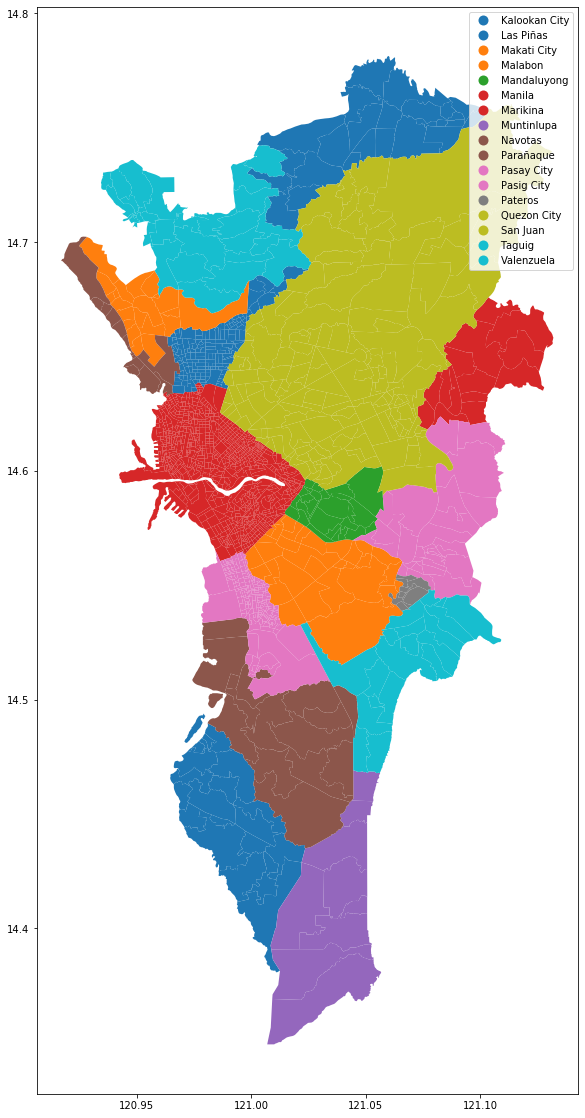

In [8]:
gdf.plot(column='NAME_2', cmap=None, legend=True, figsize=(20,20))

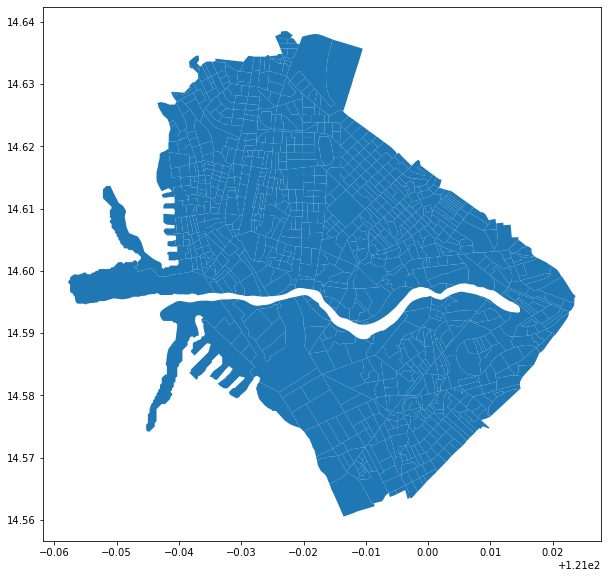

In [9]:
df = gdf.loc[gdf['NAME_2'] == 'Manila'] #df is only barangays for City of Manila
df.plot(figsize=(10,10))

Data for walking network

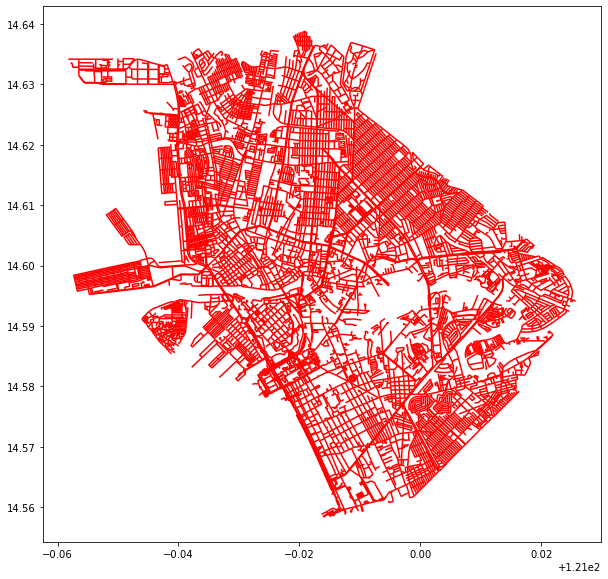

In [10]:
gdf2 = gpd.read_file('edges')
gdf2.plot(color='red', markersize=0.1, figsize=(10,10))

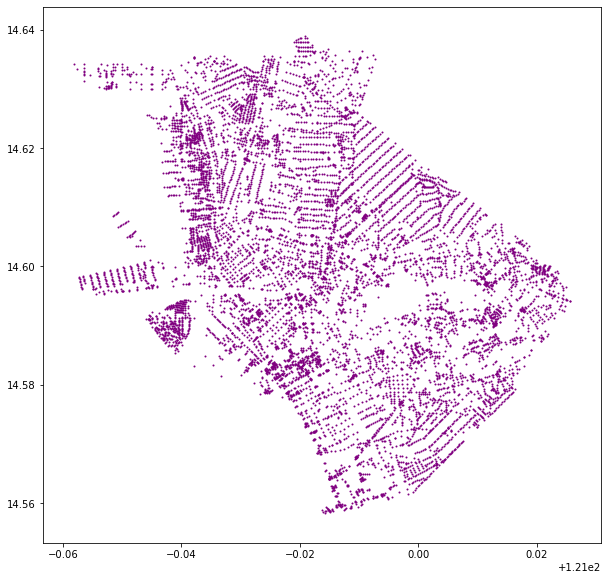

In [11]:
gdf3 = gpd.read_file('nodes')
gdf3.plot(color='purple', markersize = 1, figsize=(10,10))

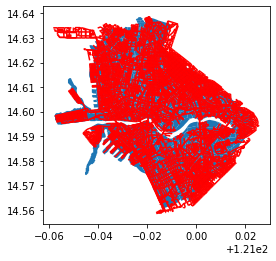

In [14]:
f, ax = plt.subplots(1)
gdf2.plot(ax=ax, color = 'red', markersize=1, figsize=(10,10))
df.plot(ax=ax, figsize=(10,10))

plt.show()

Creating centroids from barangay geometry

In [15]:
conda install shapely

failed

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [16]:
import shapely

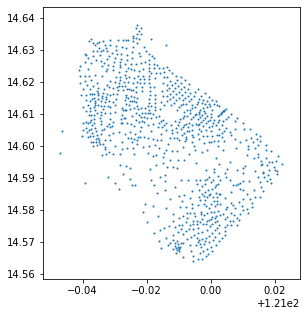

In [17]:
cent = df.centroid
cent.plot(markersize = 1, figsize=(5,5))

In [18]:
ax.set_aspect('equal')

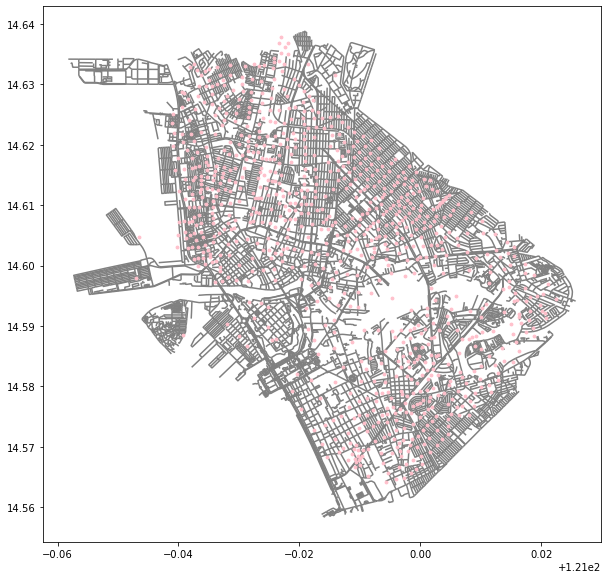

In [19]:
#Plotting barangay centroids on walking network

f, ax = plt.subplots(1,1, figsize=(10,10))
gdf2.plot(ax=ax, color = 'gray', markersize=1, figsize=(10,10))
cent.plot(ax=ax, color = 'pink', markersize =8, figsize=(10,10), zorder=2)

plt.show()

In [20]:
cent.tail()

1180    POINT (120.96209 14.62176)
1181    POINT (120.96249 14.62059)
1182    POINT (120.96061 14.62628)
1183    POINT (120.96173 14.62400)
1184    POINT (120.97360 14.59379)
dtype: geometry

## Geocoding hospitals

In [21]:
import geopy
import geopandas as gpd

In [22]:
from geopy.geocoders import Nominatim

In [23]:
locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode('University of Santo Tomas Hospital, Sampaloc')
print('Latitude = {}, Longitude = {}'.format(location.latitude, location.longitude))

#Do this for every hospital in dataframe. (I did this manually, but I'm sure there's a more efficient way.)

Latitude = 14.6112963, Longitude = 120.99019493100002


In [24]:
#import csv with geolocated hospitals

gf = pd.read_csv("Hospitals.csv")
gf.head()

,Hospital,Latitude,Longitude
0,"Amisola Maternity Hospital, Tondo",14.632853,120.978105
1,"Chinese General Hospital and Medical Center, S...",14.626306,120.987780
2,"De Ocampo Memorial Medical Center, Santa Mesa",14.599832,120.999627
3,"Dr. Jose Fabella Memorial Hospital, Santa Cruz",14.606162,120.984254
4,Esperanza Health Center – Santa Mesa,14.551447,121.022162


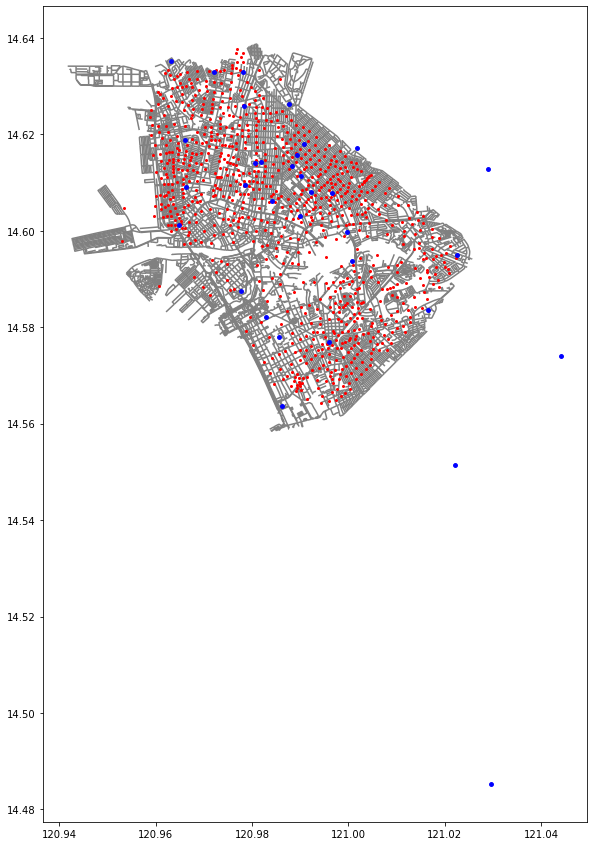

In [27]:
f, ax = plt.subplots(1,1, figsize=(15,15))
gdf2.plot(ax=ax, color = 'gray', markersize=1, figsize=(10,10))
cent.plot(ax=ax, color = 'red', markersize =4, figsize=(10,10), zorder=2)
ax.scatter(gf.Longitude, gf.Latitude, zorder=3, c='b', s=15)

plt.show()

Some of the geolocated hospitals are outside of our city boundary.